# Clase 12 - Reconocimiento de Patrones en Imagenes

In [6]:
from matplotlib import markers
import numpy as np
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.datasets import make_blobs

def data():
    X= [[2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0],
    [2.3, 2.7],
    [2.0, 1.6],
    [1.0, 1.1],
    [1.5, 1.6],
    [1.1, 0.9]]

    X = np.array(X).T
    return X

In [7]:
def euclid_dist(x,y):
    #%Calcula la distancia eucliciana entre dos matrices

    #% x: Matriz datos-columna
    #% y: centroides datos-columna

    N  = x.shape[1]
    P = y.shape[1]
    d = np.zeros((P, N))
    for i in range(P):
        d[i,:] = np.sum(( x - repmat(y[:,i].reshape(2,1), 1,N))**2, axis=0)

    d = np.sqrt(d)
    return d

In [8]:
def VQ(v,no_centroids, e):
    #% v:  Cada columna es un dato
    #% b:  Codebook generated

    #% Primera fase: Generacion de dos centroides
    no_update = 30                        # no de actualizacion
    c = np.mean(v, axis=1).reshape(2,1)   # media inicial

    center = np.zeros((2,2))
    center[:,0] = (1+e)*c.T       # % separacion de las medias
    center[:,1] = (1-e)*c.T

    for up1 in range(no_update):
        d = euclid_dist(v,center)      #% calculo de la distancia euclidiana
        id = np.argmin(d,axis=0)    #% busqueda de los mas cercanos
        rows, cols = center.shape

        #% busqueda de los clusters
        for j in range (cols):
            center[:,j] = np.mean(v[:,np.argwhere(id==j).flatten()],axis=1)

    n=1
    n=n*2

    # Segunda fase: generacion de nuevos centroides
    while cols < no_centroids:  #% creacion de nuevos centroides
                                #% hasta alcanzar el numero requerido
        c = center
        center = np.zeros((2,n*2))
        for i in range(cols):           # % numero de centroides
            center[:,i] = (1+e)*c[:,i]       # % separacion de las medias
            center[:,i+n] = (1-e)*c[:,i]


        for up2 in range(no_update):     # update2
            d = euclid_dist(v,center)     # calculo de la distancia euclidiana

            i = np.argmin(d, axis=0)    # busqueda de los mas cercanos

            rows, cols = center.shape

            #% busqueda de los clusters
            for j in range(cols):
                center[:,j] = np.mean(v[:,np.argwhere(i==j).flatten()], axis=1)


        n=n*2

    return center

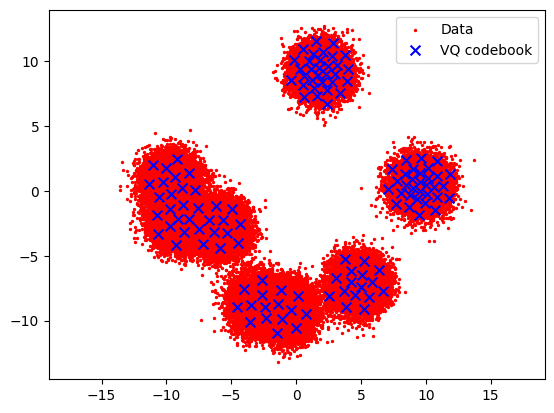

In [9]:
# Generamos tres clusters 2D con  1000 puntos
X, _ = make_blobs(  n_samples=100000,
                    centers=8,
                    n_features=2)

X = X.T

#%Parametros de algoritmo VQ
e = 0.01   #% parametro de division
center = VQ(X, 128, e)

plt.figure
plt.scatter(X[0,:], X[1,:],marker='o',color='red', s=2, label='Data')
plt.scatter(center[0,:], center[1,:], marker='x', s=50, color='blue', label='VQ codebook')
plt.axis('equal')
plt.legend()
plt.show()